In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
from keras.datasets import mnist
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.layers import Dense, Input,  Conv2D, MaxPooling2D, UpSampling2D, Lambda, Layer, Lambda

Using TensorFlow backend.


In [3]:
%matplotlib inline

# pca vs t-sne

In [4]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [5]:
pca = PCA(2)  # project from 64 to 2 dimensions
pca_projected = pca.fit_transform(digits.data)
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
print(digits.data.shape)
print(pca_projected.shape)

explained variance ratio (first two components): [ 0.14890594  0.13618771]
(1797, 64)
(1797, 2)


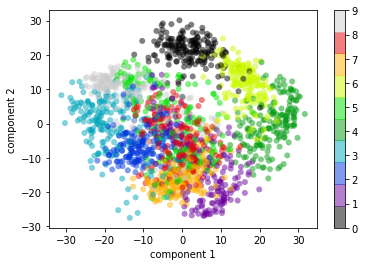

In [6]:
plt.scatter(pca_projected[:, 0], pca_projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [7]:
print (pca_projected.shape)
pca_projected

(1797, 2)


array([[ -1.25946599,  21.27488165],
       [  7.95761305, -20.76870114],
       [  6.99192146,  -9.95598454],
       ..., 
       [ 10.80128246,  -6.96025245],
       [ -4.8720983 ,  12.4239503 ],
       [ -0.34439224,   6.36555236]])

In [8]:
tsne = TSNE(n_iter=1500) # project from 64 to 2 dimensions
tsne_projected = tsne.fit_transform(digits.data)
print(digits.data.shape)
print(tsne_projected.shape)

(1797, 64)
(1797, 2)


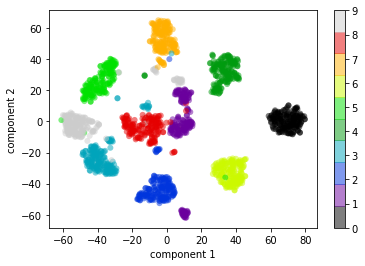

In [9]:
plt.scatter(tsne_projected[:, 0], tsne_projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# mnist - pca vs autoencoder

In [13]:
np.random.seed(1337)  # for reproducibility
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print (x_train.shape)
print (y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
# data pre-processing(# minmax_normalized)
x_train = x_train.astype('float32') / 255. - 0.5       
x_test = x_test.astype('float32') / 255. - 0.5  
print (x_train.shape)
print (y_train.shape)

(60000, 28, 28)
(60000,)


In [6]:
print (np.max(x_test))
print (np.min(x_test))

0.5
-0.5


In [7]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## pca

In [10]:
pca = PCA(n_components=2) # project from 64 to 2 dimensions
pca.fit(x_train)
print(pca.explained_variance_ratio_) 
print(x_train.shape)

[ 0.09704725  0.07095958]
(60000, 784)


In [11]:
mnist_pca_projected = pca.transform(x_test)
print(x_test.shape)
print(mnist_pca_projected.shape)

(10000, 784)
(10000, 2)


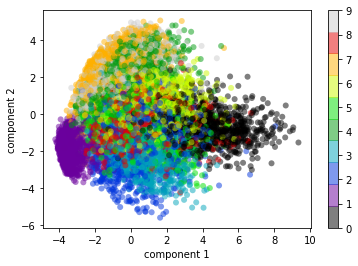

In [12]:
plt.scatter(mnist_pca_projected[:, 0], mnist_pca_projected[:, 1],
            c=y_test, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## autoencoder (pca version)

In [18]:
# 784維 -> 2維
# in order to plot in a 2D figure
encoding_dim = 2
# this is our input placeholder
input_img = Input(shape=(784,))

In [19]:
# to perform pca, we don't use activation function and the cost function is MSE
# encoder layers
encoder_output = Dense(encoding_dim)(input_img)
# decoder layers
decoded = Dense(784)(encoder_output)
# construct the autoencoder model
autoencoder = Model(inputs=input_img, outputs=decoded)

In [20]:
encoder = Model(inputs=input_img, outputs=encoder_output)

In [21]:
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [22]:
# training
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True)

Epoch 1/20
60000/60000 [==============================] - 2s - loss: 0.0896       - ETA: 14s - loss: 0.2270

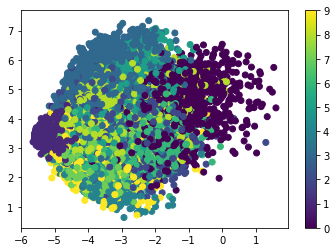

In [24]:
# plotting
encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()

# autoencoder (Do it yourself)